<a href="https://colab.research.google.com/github/JanaShebl/JanaShebl/blob/main/Graduation_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler,RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense  , Flatten, Input

In [5]:
df=pd.read_csv('/content/spaceship_titanic_dataset.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8873,7594_01,Europa,True,C/282/S,55 Cancri e,49.0,False,0.0,0.0,0.0,0.0,0.0,Minonus Supiensive,True
8874,2065_01,Earth,False,F/410/P,TRAPPIST-1e,13.0,False,12.0,0.0,0.0,0.0,1963.0,Lavey Jeffey,False
8875,6656_01,Europa,True,B/221/P,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,NaN,Naviton Suarging,True
8876,4562_01,Europa,True,B/180/S,TRAPPIST-1e,31.0,False,0.0,0.0,0.0,0.0,0.0,Shaton Reedall,True
8877,2697_01,Mars,False,D/91/S,TRAPPIST-1e,27.0,NaN,1893.0,487.0,4.0,0.0,0.0,Pank Pimne,False


In [7]:
df.shape

(8878, 14)

In [8]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [9]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8695.000000,8694.000000,8666.000000,8692.000000,8684.000000
mean,28.839756,226.318344,455.938463,173.933880,309.497354,306.386112
std,14.500781,668.461056,1603.965161,601.921585,1131.027169,1151.269872
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,48.500000,76.000000,28.000000,59.000000,45.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [10]:
df.dtypes

,0
PassengerId,object
HomePlanet,object
CryoSleep,object
Cabin,object
Destination,object
Age,float64
VIP,object
RoomService,float64
FoodCourt,float64
ShoppingMall,float64


In [11]:
df.select_dtypes(include=['number']).columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

In [12]:
df.select_dtypes(include=['object','bool']).columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name', 'Transported'],
      dtype='object')

In [13]:
df.duplicated().sum()

np.int64(185)

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.isna().sum()

,0
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


In [16]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [17]:
df['HomePlanet']=df['HomePlanet'].fillna(df['HomePlanet'].mode()[0])
df['CryoSleep']=df['CryoSleep'].fillna(df['CryoSleep'].mode()[0])
df['Destination']=df['Destination'].fillna(df['Destination'].mode()[0])
df['VIP']=df['VIP'].fillna(df['VIP'].mode()[0])
df['RoomService']=df['RoomService'].fillna(df['RoomService'].mean())
df['FoodCourt']=df['FoodCourt'].fillna(df['FoodCourt'].mean())
df['ShoppingMall']=df['ShoppingMall'].fillna(df['ShoppingMall'].mean())
df['Spa']=df['Spa'].fillna(df['Spa'].mean())
df['VRDeck']=df['VRDeck'].fillna(df['VRDeck'].mean())
df['Name']=df['Name'].fillna("NOT FOUND")

/tmp/ipython-input-1741144814.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CryoSleep']=df['CryoSleep'].fillna(df['CryoSleep'].mode()[0])
/tmp/ipython-input-1741144814.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['VIP']=df['VIP'].fillna(df['VIP'].mode()[0])


In [18]:
df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


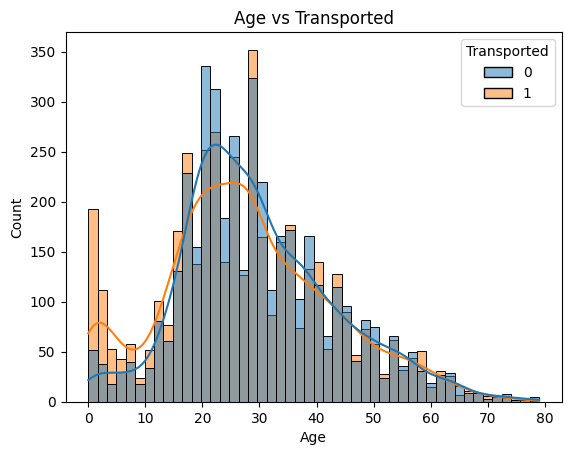

In [54]:
sns.histplot(data=df, x='Age', hue='Transported', kde=True)
plt.title('Age vs Transported')
plt.show()

In [20]:
df.drop(['PassengerId','Name','Cabin'],axis=1,inplace=True)

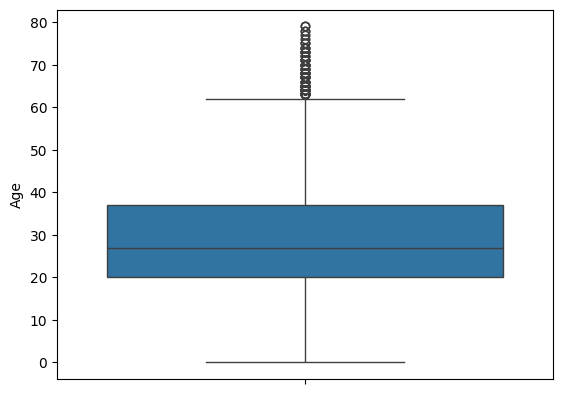

In [21]:
sns.boxplot(df['Age'])
plt.show()

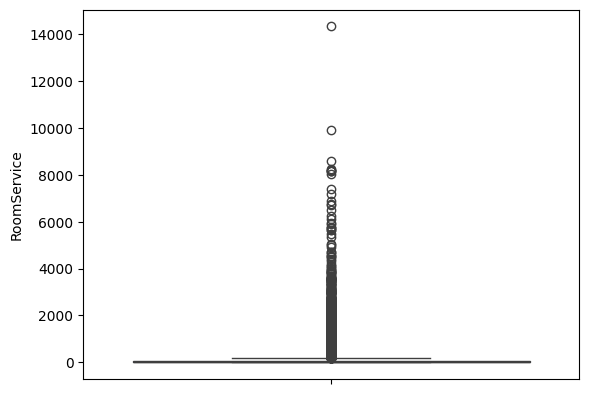

In [22]:
sns.boxplot(df['RoomService'])
plt.show()

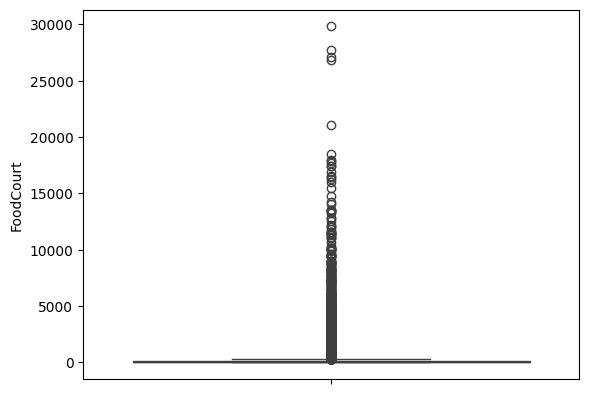

In [23]:
sns.boxplot(df['FoodCourt'])
plt.show()

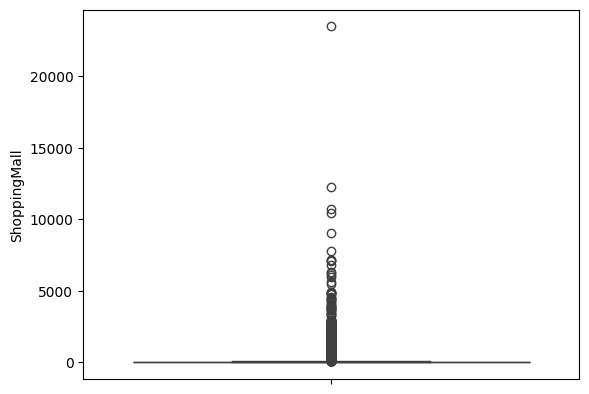

In [24]:
sns.boxplot(df['ShoppingMall'])
plt.show()

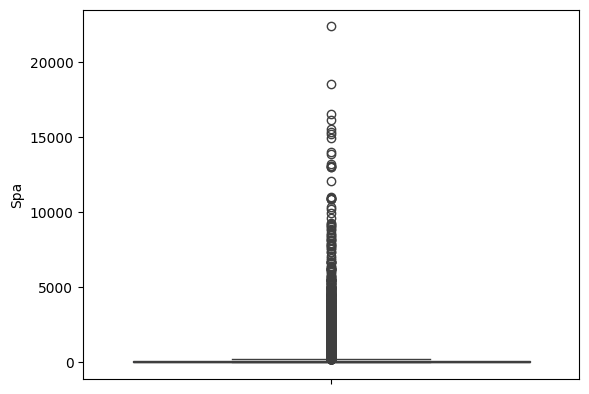

In [25]:
sns.boxplot(df['Spa'])
plt.show()

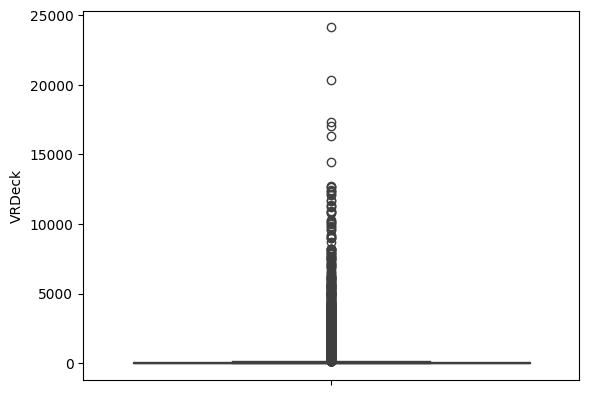

In [26]:
sns.boxplot(df['VRDeck'])
plt.show()

In [27]:
df['Total']=df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1)

In [28]:
la=LabelEncoder()

In [29]:
df['CryoSleep']=df['CryoSleep'].astype(int)
df['VIP']=df['VIP'].astype(int)
df['Transported']=df['Transported'].astype(int)

In [30]:
df = pd.get_dummies(df, columns=['HomePlanet', 'Destination'])

In [51]:
# هستخدم ال RobustScaler عشان ال outliers
scaler = RobustScaler()
df['RoomService']=scaler.fit_transform(df[['RoomService']])
df['FoodCourt']=scaler.fit_transform(df[['FoodCourt']])
df['ShoppingMall']=scaler.fit_transform(df[['ShoppingMall']])
df['Spa']=scaler.fit_transform(df[['Spa']])
df['VRDeck']=scaler.fit_transform(df[['VRDeck']])
df['Total']=scaler.fit_transform(df[['Total']])

In [50]:
x=df.drop('Transported',axis=1)
y=df['Transported']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
print("Logistic Model Accuracy : ",lr_model.score(x_test,y_test))

Logistic Model Accuracy :  0.777458309373203


In [46]:
k_values=list(range(1,40))
accuracy_values=[]
for k in k_values:
  knn_model=KNeighborsClassifier(n_neighbors=k)
  cv_score=cross_val_score(knn_model,x_train,y_train,cv=10)
  accuracy_values.append(cv_score.mean())

In [47]:
best_k=k_values[accuracy_values.index(max(accuracy_values))]

In [48]:
knn_model=KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=25)

In [49]:
print("KNN Model Accuracy : ",knn_model.score(x_test,y_test))

KNN Model Accuracy :  0.7561817136285222


In [56]:
model=Sequential([
Dense(16,activation='relu',input_shape=(x_train.shape[1],)),
Dense(8,activation='relu'),
Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
model.fit(x_train,y_train,epochs=10,batch_size=64)

Epoch 1/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7938 - loss: 0.4220
Epoch 2/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7952 - loss: 0.4172
Epoch 3/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7961 - loss: 0.4140
Epoch 4/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7985 - loss: 0.4135
Epoch 5/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8005 - loss: 0.4141
Epoch 6/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7991 - loss: 0.4154
Epoch 7/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7937 - loss: 0.4214
Epoch 8/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7994 - loss: 0.4084
Epoch 9/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7889 - loss: 0.4224
Epoch 10/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8067 - loss: 0.4089


In [62]:
model.fit(x_train,y_train,epochs=20,batch_size=64)

Epoch 1/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7967 - loss: 0.4164
Epoch 2/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7997 - loss: 0.4159
Epoch 3/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7950 - loss: 0.4251
Epoch 4/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8012 - loss: 0.4119
Epoch 5/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7911 - loss: 0.4255
Epoch 6/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7912 - loss: 0.4267
Epoch 7/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8018 - loss: 0.4145
Epoch 8/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7908 - loss: 0.4227
Epoch 9/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7948 - loss: 0.4179
Epoch 10/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7984 - loss: 0.4128
Epoch 11/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8051 - loss: 0.4100
Epoch 12/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [63]:
model.fit(x_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7923 - loss: 0.4229
Epoch 2/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7969 - loss: 0.4258
Epoch 3/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7975 - loss: 0.4217
Epoch 4/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8088 - loss: 0.4083
Epoch 5/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7977 - loss: 0.4120
Epoch 6/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7991 - loss: 0.4160
Epoch 7/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8076 - loss: 0.4089
Epoch 8/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7950 - loss: 0.4171
Epoch 9/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8009 - loss: 0.4128
Epoch 10/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8074 - loss: 0.4047


In [64]:
model.fit(x_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7938 - loss: 0.4285
Epoch 2/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8040 - loss: 0.4158
Epoch 3/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7961 - loss: 0.4176
Epoch 4/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8008 - loss: 0.4092
Epoch 5/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7980 - loss: 0.4230
Epoch 6/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7941 - loss: 0.4210
Epoch 7/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8045 - loss: 0.4130
Epoch 8/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8005 - loss: 0.4137
Epoch 9/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7984 - loss: 0.4198
Epoch 10/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7972 - loss: 0.4199
Epoch 11/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8010 - loss: 0.4182
Epoch 12/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step